# Unit 3 Final Project

# 📝 My Question
What proportion of Spotify songs have a popularity of 75 or less?

# 📊 My Study

*my design:*
- I am using spotify API
- I will measure spotify songs and their proportion
- I will sample 1000 songs from the API

# 🔬 My Analysis

In [32]:
import requests
import json
import random
import asyncio
import os
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [33]:

auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': "c487bf59769c44f7a119b4352fc538d1",
    'client_secret': "e0ad393c881b4e0ea933016893778c21",
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

In [34]:
has55 = 0
total_articles_sampled = 0
proportions = []
pair_count = 0
short_in_pair = 0
count = 0
sample_size = 10
seen_tracks = set()
while count < sample_size :
    print(count, "---------")
    for i in range(10):
        print(i)
        random_char = random.choice('abcdefghijklmnopqrstuvwxyz')
        search_query = f"{random_char}%"
        random_offset = random.randint(0, 950)
        spotify_response = requests.get(
            'https://api.spotify.com/v1/search',
            headers=headers,
            params={
                'q': search_query,
                'type': 'track',
                'limit': 50,
                'offset': random_offset
            }
        )
        if spotify_response.status_code == 429:
            wait = int(spotify_response.headers.get("Retry-After", 2))
            print(f"Rate limit hit — waiting {wait} seconds")
            time.sleep(wait)
            continue
        time.sleep(0.2)
        spotify_data = spotify_response.json()
        items = spotify_data['tracks']['items']
        unique_tracks = [track for track in items if track['id'] not in seen_tracks]
        if not unique_tracks:
            continue

        track = random.choice(unique_tracks)
        seen_tracks.add(track['id'])

        pop = track['popularity']
        print("pop" ,pop)
        if pop == 0 :
            continue

        elif pop <= 75:
            has55 += 1
            short_in_pair += 1
        pair_count += 1
        total_articles_sampled += 1
        if pair_count == 10:
            pair_proportion = short_in_pair / 10
            proportions.append(pair_proportion)
            pair_count = 0
            short_in_pair = 0
    count += 1

0 ---------
0
pop 82
1
pop 78
2
pop 73
3
pop 65
4
pop 91
5
pop 85
6
pop 73
7
pop 63
8
pop 88
9
pop 73
1 ---------
0
pop 55
1
pop 86
2
pop 80
3
pop 78
4
pop 77
5
pop 72
6
pop 89
7
pop 62
8
pop 57
9
pop 84
2 ---------
0
pop 76
1
pop 65
2
pop 83
3
pop 77
4
pop 74
5
pop 83
6
pop 84
7
pop 90
8
pop 85
9
pop 86
3 ---------
0
pop 71
1
pop 79
2
pop 78
3
pop 68
4
pop 85
5
pop 77
6
pop 68
7
pop 82
8
pop 86
9
pop 82
4 ---------
0
pop 78
1
pop 72
2
pop 77
3
pop 72
4
pop 71
5
pop 78
6
pop 68
7
pop 81
8
pop 72
9
pop 64
5 ---------
0
pop 75
1
pop 83
2
pop 21
3
pop 81
4
pop 87
5
pop 91
6
pop 79
7
pop 71
8
pop 79
9
pop 75
6 ---------
0
pop 77
1
pop 92
2
pop 79
3
pop 89
4
pop 78
5
pop 76
6
pop 86
7
pop 79
8
pop 85
9
pop 85
7 ---------
0
pop 90
1
pop 83
2
pop 80
3
pop 85
4
pop 83
5
pop 82
6
pop 79
7
pop 87
8
pop 85
9
pop 87
8 ---------
0
pop 82
1
pop 88
2
pop 82
3
pop 84
4
pop 89
5
pop 59
6
pop 90
7
pop 76
8
pop 83
9
pop 85
9 ---------
0
pop 87
1
pop 85
2
pop 84
3
pop 79
4
pop 82
5
pop 77
6
pop 80
7
pop 8

Standard Error: 0.04330127018922193
margin of error: 0.08487048957087498
proportion 0.25


(0.0, 1.0)

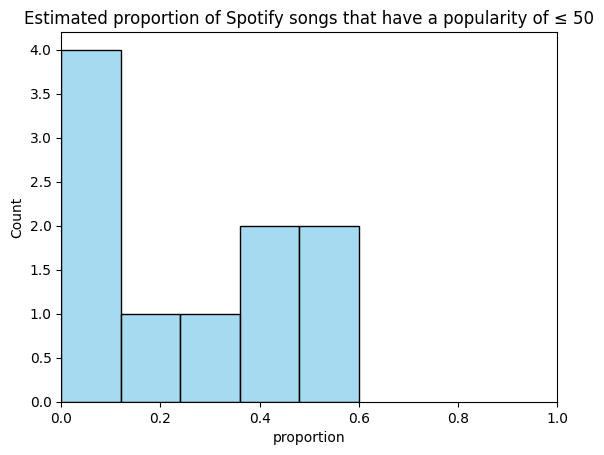

In [35]:
overall_proportion = has55 / total_articles_sampled
n = total_articles_sampled
p = overall_proportion
SE = (p * (1 - p) / n) ** 0.5
print("Standard Error:", SE)
MOE = 1.96 * SE
print("margin of error:",MOE)
print("proportion", overall_proportion)
plt.xlabel("proportion")
sns.histplot(x=proportions,color="skyblue")
plt.title("Estimated proportion of Spotify songs that have a popularity of ≤ 50")
plt.xlim(0,1)

# ✅ My Answer

based on my simulation, 25% of Spotify songs have a popularity score of 75 or less. I can be 95% confident that the true proportion lies between 16.5% and 33.5%, with a margin of error of 8.5%, with a standard error of 0.0433. there is also a bias because with my sampling method it would give me songs that have a heigher popularity than I'd assume.